In [1]:
import pandas as pd 
data = pd.read_csv('data/wine.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [4]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [ ]:
#Сколько всего дегустаторов приняло участие в винных обзорах?
data['taster_name'].nunique()

19

In [11]:
#В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить.Найдите все повторяющиеся строки в данных и удалите их.

# Сохраняем исходное количество строк
initial_rows = len(data)

# Проверяем наличие полных дубликатов (все колонки одинаковые)
full_duplicates = data.duplicated().sum()
print(f"Количество полных дубликатов (все поля одинаковые): {full_duplicates}")
#  Удаляем полные дубликаты
data_cleaned = data.drop_duplicates()

# Считаем сколько удалено
rows_removed = initial_rows - len(data_cleaned)

print(f"\nИтоговая статистика:")
print(f"Изначально строк: {initial_rows}")
print(f"После удаления дубликатов: {len(data_cleaned)}")
print(f"Удалено дублирующихся записей: {rows_removed}")

Количество полных дубликатов (все поля одинаковые): 9983

Итоговая статистика:
Изначально строк: 129971
После удаления дубликатов: 119988
Удалено дублирующихся записей: 9983


In [14]:
#Проверьте датасет на наличие пропусков в данных.
#В каких из представленных признаках были обнаружены пропуски?

# Создаем DataFrame с информацией о пропусках по каждому столбцу
missing_analysis = pd.DataFrame({
    'Столбец': data.columns,
    'Пропущенных значений': data.isnull().sum().values,
    'Процент пропусков': (data.isnull().sum().values / len(data) * 100).round(2)
})

# Отфильтровываем только столбцы с пропусками
columns_with_missing = missing_analysis[missing_analysis['Пропущенных значений'] > 0]

print("=== СТОЛБЦЫ С ПРОПУСКАМИ ===")
print("Всего столбцов в датасете:", len(data.columns))
print("Столбцов с пропусками:", len(columns_with_missing))
print()
# Показываем столбцы с пропусками
if len(columns_with_missing) > 0:
    print("Список столбцов с пропусками:")
    for idx, row in columns_with_missing.iterrows():
        column_name = row['Столбец']
        missing_count = row['Пропущенных значений']
        percentage = row['Процент пропусков']
        print(f"  - {column_name}: {missing_count} пропусков ({percentage}%)")

=== СТОЛБЦЫ С ПРОПУСКАМИ ===
Всего столбцов в датасете: 13
Столбцов с пропусками: 9

Список столбцов с пропусками:
  - country: 63 пропусков (0.05%)
  - designation: 37465 пропусков (28.83%)
  - price: 8996 пропусков (6.92%)
  - province: 63 пропусков (0.05%)
  - region_1: 21247 пропусков (16.35%)
  - region_2: 79460 пропусков (61.14%)
  - taster_name: 26244 пропусков (20.19%)
  - taster_twitter_handle: 31213 пропусков (24.02%)
  - variety: 1 пропусков (0.0%)


In [16]:
#Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в модуле PYTHON-14. Очистка данных.
# Воспользуйтесь правилами:
# Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению 
# общего распределения, а удаление записей — к большой утрате данных.
# Заполняйте данные с умом! Если перед вами количественный признак, 
# то использование нецелого числа в качестве константы является как минимум нелогичным.
# Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. 
# Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.

# Анализ пропусков по каждому столбцу
missing_info = pd.DataFrame({
    'Столбец': data.columns,
    'Тип данных': data.dtypes.values,
    'Пропусков': data.isnull().sum().values,
    'Процент пропусков': (data.isnull().sum().values / len(data) * 100).round(2)
})

print("\n=== АНАЛИЗ ПРОПУСКОВ ===")
print(missing_info[missing_info['Пропусков'] > 0].to_string(index=False))

# Определяем столбцы с более чем 30% пропусков для удаления
threshold = 30
columns_to_drop = missing_info[
    (missing_info['Процент пропусков'] > threshold) & 
    (missing_info['Пропусков'] > 0)
]['Столбец'].tolist()

print(f"\n=== УДАЛЕНИЕ СТОЛБЦОВ С >{threshold}% ПРОПУСКОВ ===")
if columns_to_drop:
    print(f"Удаляемые столбцы: {columns_to_drop}")
    data = data.drop(columns=columns_to_drop)
    print(f"Столбцы удалены. Новый размер датасета: {data.shape}")
else:
    print(f"Нет столбцов с >{threshold}% пропусков")


=== АНАЛИЗ ПРОПУСКОВ ===
              Столбец Тип данных  Пропусков  Процент пропусков
              country     object         63               0.05
          designation     object      37465              28.83
                price    float64       8996               6.92
             province     object         63               0.05
             region_1     object      21247              16.35
             region_2     object      79460              61.14
          taster_name     object      26244              20.19
taster_twitter_handle     object      31213              24.02
              variety     object          1               0.00

=== УДАЛЕНИЕ СТОЛБЦОВ С >30% ПРОПУСКОВ ===
Удаляемые столбцы: ['region_2']
Столбцы удалены. Новый размер датасета: (129971, 12)


<Axes: >

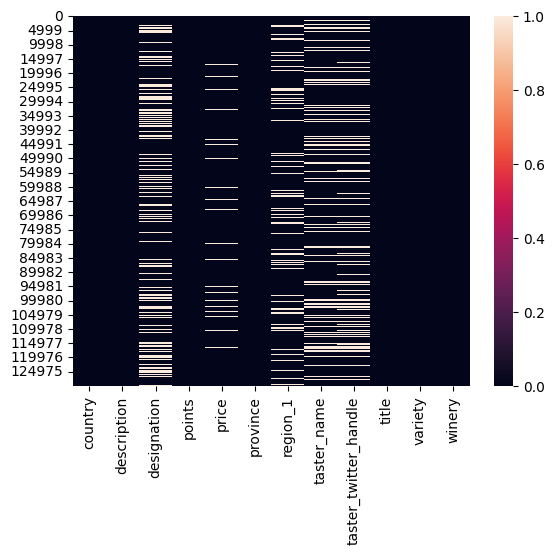

In [18]:
import seaborn as sns
sns.heatmap(data.isnull()) # наглядная карта пропусков

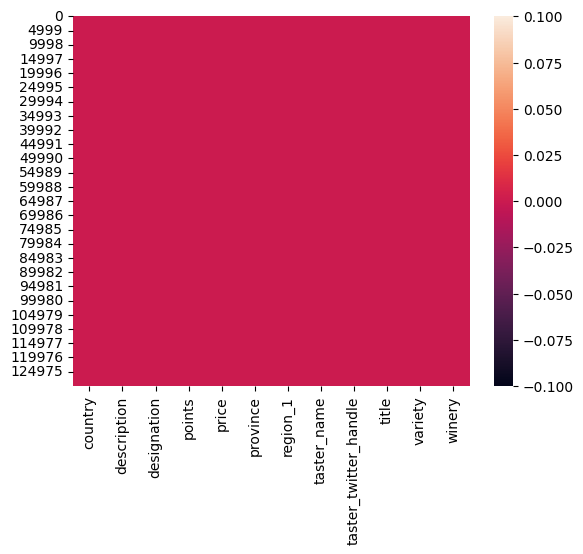

In [ ]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

data['designation'] = data['designation'].fillna('unknown')
data['region_1'] = data['region_1'].fillna('unknown')
data['taster_name'] = data['taster_name'].fillna('unknown')
data['taster_twitter_handle'] = data['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
data['country'] = data['country'].fillna('US')
data['price'] = data['price'].fillna(data['price'].mean())
data['province'] = data['province'].fillna('California')
data['variety'] = data['variety'].fillna('Pinot Noir')
# в числовом признаке выберем метод замены средним значением
data['price'] = data['price'].fillna(data['price'].mean())
sns.heatmap(data.isnull()) # убеждаемся, что датасет без пропусков
data = data.to_csv('data/wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы


In [4]:
#Работа с ydata-profiling на примере винных обзоров
import pandas as pd
from ydata_profiling import ProfileReport

In [5]:
df = pd.read_csv('data/wine.csv')

In [6]:
profile = ProfileReport(df, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:07<00:00,  1.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

TypeError: asarray() got an unexpected keyword argument 'copy'

In [7]:
profile.to_file("Pandas Profiling Report.html")

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

TypeError: asarray() got an unexpected keyword argument 'copy'

In [9]:
import pandas as pd
import sweetviz as sv
df = pd.read_csv('data/wine.csv')

In [10]:
report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
import pandas as pd
import dtale

df = pd.read_csv('data/wine.csv')

In [11]:
d = dtale.show(df)
d

In [13]:
import statistics

In [14]:
#Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых
average_price = statistics.mean(df['price'].dropna()) #если есть пропуски, то будет ответ nan,поэтому добавляем dropna
print(average_price)

35.363389129985535


In [15]:
#Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.
mean = sum(df['price'].dropna()) / len(df['price'].dropna())
print(mean)

35.363389129985535


In [26]:
#медиана стоимости 
median_price = statistics.median(df['price'].dropna())
print(median_price)

25.0


In [28]:
#медиана в станд python
count_price = len(df['price'].dropna()) # количество записей цен
sorted_price = sorted(df['price'].dropna()) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

25.0

In [31]:
#mode
mode_price = statistics.mode(df['price'])
print(mode_price)

20.0


In [ ]:
mode = round(df["price"].value_counts().index[0],2)
print(mode)

20.0


In [19]:
correlation_value = df['price'].corr(df['points'])
# Округление до 6 знаков после запятой
rounded_correlation = round(correlation_value, 6)

print(f"Коэффициент корреляции между ценой и баллами: {rounded_correlation}")

Коэффициент корреляции между ценой и баллами: 0.416167


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Создание графика
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
stats.probplot(df['price'], plot=plt)
plt.title('Q-Q Plot цены')

plt.subplot(1, 2, 2)
plt.hist(df['price'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения цены')

plt.tight_layout()

# Сохранение графика в файл
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')
print("График сохранен как 'price_distribution.png'")

In [24]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Создание графика
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
stats.probplot(df['points'], plot=plt)
plt.title('Q-Q Plot points')

plt.subplot(1, 2, 2)
plt.hist(df['points'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения рейтинга')

plt.tight_layout()

# Сохранение графика в файл
plt.savefig('points_distribution.png', dpi=300, bbox_inches='tight')
print("График сохранен как 'points_distribution.png'")

График сохранен как 'points_distribution.png'


In [29]:
import pandas as pd

# Загрузка данных
# df = pd.read_csv('wine_reviews.csv')

# Вычисление корреляции Спирмена между двумя переменными
spearman_corr = df['price'].corr(df['points'], method='spearman')
rounded_spearman_corr=round(spearman_corr,2)
print(f"Коэффициент корреляции Спирмена: {rounded_spearman_corr:}")

Коэффициент корреляции Спирмена: 0.61


In [30]:
import pandas as pd

# Загрузка данных
# df = pd.read_csv('wine_reviews.csv')

# Вычисление корреляции Кендалла между двумя переменными
kendall_corr = df['price'].corr(df['points'], method='kendall')
rounded_kendall_corr=round(kendall_corr,2)
print(f"Коэффициент корреляции Кендалла: {rounded_kendall_corr:}")

Коэффициент корреляции Кендалла: 0.45


In [32]:
from sklearn.metrics import matthews_corrcoef
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333